In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%writefile summarizer.py 


from dotenv import load_dotenv
load_dotenv()

from langchain.chat_models import init_chat_model
from states import State

def summarizer_node(state: State):
    llm = init_chat_model("anthropic:claude-3-5-sonnet-latest")

    prompt_template = """
    You are  a helpful assistant. You are will be given a question the context to answer the question. Give a short concise answer to the question based on the context. 
    If you don't know the answer, just say so.

    Question: {question}
    Context: {context}
    Ans: 
    """
    response = llm.invoke(prompt_template.format(question=state["question"], context=state["search_results"]))
    return {"summarized_result": response.content}

Overwriting summarizer.py


In [3]:
state = {'question': 'Ajit Kumar Shiv Nadar University',
 'search_results': "Title:Ajit Kumar's email & phone - Shiv Nadar University\nURL:https://www.datanyze.com/people/Ajit-Kumar/12693059685\nContent: Ajit Kumar works as a QC Microbiologist at Shiv Nadar University, which is a Colleges & Universities company with an estimated 16 employees; and founded in 2011\n\nTitle:Who are some of the best professors at Shiv Nadar ...\nURL:https://www.quora.com/Who-are-some-of-the-best-professors-at-Shiv-Nadar-University\nContent: Ajit Kumar: He is one of the professors in the mathematics department. He has a very unique style of teaching. He believes in zero mugging\n\nTitle:Ajit Kumar krajit\nURL:https://github.com/krajit\nContent: Ajit Kumar krajit. Follow. Assistant Professor, Dept of Mathematics, Shiv Nadar University. 63 followers · 0 following. Shiv Nadar University. Greater Noida\n\nTitle:Ajit Kumar\nURL:https://snu.edu.in/faculty/ajit-kumar/\nContent: Image 1: Shiv Nadar University Logo Image 2 Image 3 *   Admissions *   Programs *   Schools and Centers *   Department of Civil Engineering *   Department of Mechanical Engineering *   Department of Computer Science and Engineering *   Department of Chemical Engineering *   Department of Electrical Engineering *   Department of Chemistry *   Department of Life Sciences *   Department of Mathematics *   Department of Physics *   Department of Design *   Department of Economics *   Department of English *   Department of International Relations and Governance Studies *   Department of Sociology *   Department of Rural Management Image 6: Ajit Kumar Your Admission Assistant. *   Programs *   Admissions *   Schools and Centers *   Student Handbook *   Admission Blogs *   Parent Handbook *   For UG Admissions 1800-102-1768\n\nTitle:Dr. Ajit Kumar\nURL:https://scholar.google.com/citations?user=IVuwuEwAAAAJ&hl=en\nContent: Bimlesh LochabProfessor, Shiv Nadar UniversityVerified email at snu.edu.in ... SM Abhinanda Sengupta, Ajit Kumar, Gayatree Barik, Aakash Ahuja, Jit Ghosh\n"}

# state = summarizer_node(state)

# state


In [4]:
# A simple test graph
from langgraph.graph import StateGraph, START, END

from states import State
from summarizer import summarizer_node

graph_builder = StateGraph(State)

graph_builder.add_node("summarize", summarizer_node)

graph_builder.add_edge(START, "summarize")
graph_builder.add_edge("summarize", END)
graph = graph_builder.compile() 

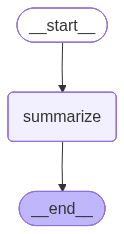

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
state = {'question': 'Ajit Kumar Shiv Nadar University',
 'search_results': "Title:Ajit Kumar's email & phone - Shiv Nadar University\nURL:https://www.datanyze.com/people/Ajit-Kumar/12693059685\nContent: Ajit Kumar works as a QC Microbiologist at Shiv Nadar University, which is a Colleges & Universities company with an estimated 16 employees; and founded in 2011\n\nTitle:Who are some of the best professors at Shiv Nadar ...\nURL:https://www.quora.com/Who-are-some-of-the-best-professors-at-Shiv-Nadar-University\nContent: Ajit Kumar: He is one of the professors in the mathematics department. He has a very unique style of teaching. He believes in zero mugging\n\nTitle:Ajit Kumar krajit\nURL:https://github.com/krajit\nContent: Ajit Kumar krajit. Follow. Assistant Professor, Dept of Mathematics, Shiv Nadar University. 63 followers · 0 following. Shiv Nadar University. Greater Noida\n\nTitle:Ajit Kumar\nURL:https://snu.edu.in/faculty/ajit-kumar/\nContent: Image 1: Shiv Nadar University Logo Image 2 Image 3 *   Admissions *   Programs *   Schools and Centers *   Department of Civil Engineering *   Department of Mechanical Engineering *   Department of Computer Science and Engineering *   Department of Chemical Engineering *   Department of Electrical Engineering *   Department of Chemistry *   Department of Life Sciences *   Department of Mathematics *   Department of Physics *   Department of Design *   Department of Economics *   Department of English *   Department of International Relations and Governance Studies *   Department of Sociology *   Department of Rural Management Image 6: Ajit Kumar Your Admission Assistant. *   Programs *   Admissions *   Schools and Centers *   Student Handbook *   Admission Blogs *   Parent Handbook *   For UG Admissions 1800-102-1768\n\nTitle:Dr. Ajit Kumar\nURL:https://scholar.google.com/citations?user=IVuwuEwAAAAJ&hl=en\nContent: Bimlesh LochabProfessor, Shiv Nadar UniversityVerified email at snu.edu.in ... SM Abhinanda Sengupta, Ajit Kumar, Gayatree Barik, Aakash Ahuja, Jit Ghosh\n"}


state = graph.invoke(state)

state

{'question': 'Ajit Kumar Shiv Nadar University',
 'search_results': "Title:Ajit Kumar's email & phone - Shiv Nadar University\nURL:https://www.datanyze.com/people/Ajit-Kumar/12693059685\nContent: Ajit Kumar works as a QC Microbiologist at Shiv Nadar University, which is a Colleges & Universities company with an estimated 16 employees; and founded in 2011\n\nTitle:Who are some of the best professors at Shiv Nadar ...\nURL:https://www.quora.com/Who-are-some-of-the-best-professors-at-Shiv-Nadar-University\nContent: Ajit Kumar: He is one of the professors in the mathematics department. He has a very unique style of teaching. He believes in zero mugging\n\nTitle:Ajit Kumar krajit\nURL:https://github.com/krajit\nContent: Ajit Kumar krajit. Follow. Assistant Professor, Dept of Mathematics, Shiv Nadar University. 63 followers · 0 following. Shiv Nadar University. Greater Noida\n\nTitle:Ajit Kumar\nURL:https://snu.edu.in/faculty/ajit-kumar/\nContent: Image 1: Shiv Nadar University Logo Image 2 